# 准备工作

## 导入模块

In [1]:
import os.path
import torch
import matplotlib.pyplot as plt

In [2]:
from nn import *
from vgg import VGG, VGG_BN
from load import load
from util import set_random_seeds, get_num_parameters, train, train_plus, loss_landscape

## 载入数据

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
set_random_seeds(seed = 0, device = device)

train_loader = load(train = True)
test_loader = load(train = False)

# 神经网络

## 初始架构

In [4]:
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN original 0.001'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_original, test_errors_original = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.46426	Test Error: 0.46610
Epoch:  2	Train Error: 0.39284	Test Error: 0.40720
Epoch:  3	Train Error: 0.34746	Test Error: 0.37080
Epoch:  4	Train Error: 0.30776	Test Error: 0.34930
Epoch:  5	Train Error: 0.29376	Test Error: 0.35000
Epoch:  6	Train Error: 0.26306	Test Error: 0.33230
Epoch:  7	Train Error: 0.22036	Test Error: 0.30660
Epoch:  8	Train Error: 0.20134	Test Error: 0.30160
Epoch:  9	Train Error: 0.19084	Test Error: 0.30770
Epoch: 10	Train Error: 0.16584	Test Error: 0.30770
Epoch: 11	Train Error: 0.15242	Test Error: 0.30270
Epoch: 12	Train Error: 0.13310	Test Error: 0.30720
Epoch: 13	Train Error: 0.12722	Test Error: 0.31080
Epoch: 14	Train Error: 0.10172	Test Error: 0.30940
Epoch: 15	Train Error: 0.09734	Test Error: 0.30760
Epoch: 16	Train Error: 0.09870	Test Error: 0.31590
Epoch: 17	Train Error: 0.06678	Test Error: 0.31460
Epoch: 18	Train Error: 0.05868	Test Error: 0.31480
Epoch: 19	Train Error: 0.05860	Test Error: 0.32420
Epoch: 20	Train Error: 0.06242	

In [13]:
print("Number of parameters:", get_num_parameters(model))

Number of parameters: 285162


In [4]:
root = '../Result/NN original'
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

losses_original = torch.load(losses_file)
train_errors_original = torch.load(train_errors_file)
test_errors_original = torch.load(test_errors_file)

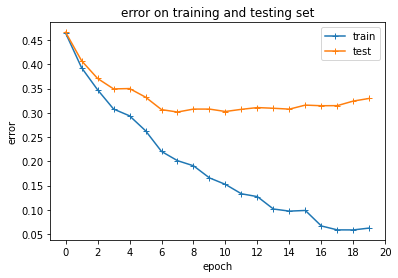

In [65]:
plt.plot(train_errors_original, '-+')
plt.plot(test_errors_original, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error on training and testing set')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

In [ ]:
lr = [1e-3, 2e-3, 1e-4, 5e-4]
losses_original = [losses_original, [], [], []]
for ind in range(1, 4):
    model = NN()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr[ind])
    criterion = nn.CrossEntropyLoss()

    root = '../Result/NN original ' + str(lr[ind])
    best_model_file = os.path.join(root, 'model.pt')
    losses_file = os.path.join(root, 'losses.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lr =', lr[ind])
    losses_original[ind], _, _ = \
        train(model, optimizer, criterion, train_loader, test_loader, device = device,
              wrap_tqdms = False, print_errors = True,
              best_model_file = best_model_file, losses_file = losses_file,
              train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

In [114]:
losses_original = []
for ind in range(4):
    root = '../Result/NN original ' + str(lr[ind])
    losses_file = os.path.join(root, 'losses.pt')

    losses_original.append(torch.load(losses_file))

## 神经元数量

In [14]:
model = NN(hidden_channels = (4, 8), hidden_neurons = (32, 32))
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN smaller'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_smaller, test_errors_smaller = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device, 
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.56712	Test Error: 0.56570
Epoch:  2	Train Error: 0.52376	Test Error: 0.52390
Epoch:  3	Train Error: 0.49590	Test Error: 0.49740
Epoch:  4	Train Error: 0.48050	Test Error: 0.48550
Epoch:  5	Train Error: 0.46458	Test Error: 0.47030
Epoch:  6	Train Error: 0.46180	Test Error: 0.47470
Epoch:  7	Train Error: 0.43794	Test Error: 0.45500
Epoch:  8	Train Error: 0.42918	Test Error: 0.44580
Epoch:  9	Train Error: 0.42394	Test Error: 0.44050
Epoch: 10	Train Error: 0.41632	Test Error: 0.43640
Epoch: 11	Train Error: 0.41192	Test Error: 0.43250
Epoch: 12	Train Error: 0.41512	Test Error: 0.43050
Epoch: 13	Train Error: 0.39754	Test Error: 0.42350
Epoch: 14	Train Error: 0.38868	Test Error: 0.41570
Epoch: 15	Train Error: 0.38494	Test Error: 0.41300
Epoch: 16	Train Error: 0.38624	Test Error: 0.41280
Epoch: 17	Train Error: 0.38194	Test Error: 0.41060
Epoch: 18	Train Error: 0.37920	Test Error: 0.40880
Epoch: 19	Train Error: 0.39170	Test Error: 0.41670
Epoch: 20	Train Error: 0.37472	

In [16]:
print("Number of parameters:", get_num_parameters(model))

Number of parameters: 18210


In [17]:
model = NN(hidden_channels = (64, 128), hidden_neurons = (512, 512))
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN bigger'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_bigger, test_errors_bigger = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.34022	Test Error: 0.36890
Epoch:  2	Train Error: 0.25568	Test Error: 0.30960
Epoch:  3	Train Error: 0.15532	Test Error: 0.26790
Epoch:  4	Train Error: 0.08938	Test Error: 0.26310
Epoch:  5	Train Error: 0.06042	Test Error: 0.26830
Epoch:  6	Train Error: 0.02886	Test Error: 0.26620
Epoch:  7	Train Error: 0.03278	Test Error: 0.27960
Epoch:  8	Train Error: 0.01704	Test Error: 0.27340
Epoch:  9	Train Error: 0.02214	Test Error: 0.27900
Epoch: 10	Train Error: 0.02302	Test Error: 0.28650
Epoch: 11	Train Error: 0.01574	Test Error: 0.27650
Epoch: 12	Train Error: 0.01422	Test Error: 0.27920
Epoch: 13	Train Error: 0.01478	Test Error: 0.27560
Epoch: 14	Train Error: 0.01156	Test Error: 0.27760
Epoch: 15	Train Error: 0.01284	Test Error: 0.28370
Epoch: 16	Train Error: 0.01016	Test Error: 0.28590
Epoch: 17	Train Error: 0.01112	Test Error: 0.27340
Epoch: 18	Train Error: 0.01032	Test Error: 0.27660
Epoch: 19	Train Error: 0.00978	Test Error: 0.27650
Epoch: 20	Train Error: 0.00998	

In [18]:
print("Number of parameters:", get_num_parameters(model))

Number of parameters: 4538250


In [19]:
plt.plot(train_errors_original, '-+')
plt.plot(train_errors_smaller, '-+')
plt.plot(train_errors_bigger, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['original', 'smaller', 'bigger'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different network structures')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 损失函数

In [19]:
model = NN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.MultiMarginLoss()

root = '../Result/NN hinge'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_hinge, test_errors_hinge = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.47478	Test Error: 0.47100
Epoch:  2	Train Error: 0.39966	Test Error: 0.41210
Epoch:  3	Train Error: 0.35528	Test Error: 0.37250
Epoch:  4	Train Error: 0.31880	Test Error: 0.35440
Epoch:  5	Train Error: 0.30490	Test Error: 0.34810
Epoch:  6	Train Error: 0.29750	Test Error: 0.34470
Epoch:  7	Train Error: 0.26048	Test Error: 0.33180
Epoch:  8	Train Error: 0.23006	Test Error: 0.31920
Epoch:  9	Train Error: 0.21676	Test Error: 0.31910
Epoch: 10	Train Error: 0.20512	Test Error: 0.32740
Epoch: 11	Train Error: 0.17606	Test Error: 0.31730
Epoch: 12	Train Error: 0.18196	Test Error: 0.32420
Epoch: 13	Train Error: 0.15332	Test Error: 0.32370
Epoch: 14	Train Error: 0.13478	Test Error: 0.32450
Epoch: 15	Train Error: 0.11732	Test Error: 0.31200
Epoch: 16	Train Error: 0.11272	Test Error: 0.32720
Epoch: 17	Train Error: 0.09168	Test Error: 0.31900
Epoch: 18	Train Error: 0.08184	Test Error: 0.31470
Epoch: 19	Train Error: 0.08724	Test Error: 0.32420
Epoch: 20	Train Error: 0.07886	

In [ ]:
plt.plot(train_errors_original, '-+')
plt.plot(train_errors_hinge, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['cross entropy', 'multi-class hinge'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different loss functions')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 正则化

In [26]:
weight_decay = (0.05, 0.01, 0.005, 0.0005, 5e-05, 5e-06)
train_errors_regularize = [[], [], [], [], [], []]
test_errors_regularize = [[], [], [], [], [], []]
for ind in range(6):
    model = NN()
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001, weight_decay = weight_decay[ind])
    criterion = nn.MultiMarginLoss()

    root = '../Result/NN regularize ' + str(weight_decay[ind])
    best_model_file = os.path.join(root, 'model.pt')
    losses_file = os.path.join(root, 'losses.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lambda =', weight_decay[ind])
    _, train_errors_regularize[ind], test_errors_regularize[ind] = \
        train(model, optimizer, criterion, train_loader, test_loader, device = device,
              wrap_tqdms = False, print_errors = True,
              best_model_file = best_model_file, losses_file = losses_file,
              train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

lambda = 5e-06
Epoch:  1	Train Error: 0.47630	Test Error: 0.47440
Epoch:  2	Train Error: 0.40784	Test Error: 0.42120
Epoch:  3	Train Error: 0.35700	Test Error: 0.37600
Epoch:  4	Train Error: 0.32792	Test Error: 0.36020
Epoch:  5	Train Error: 0.33160	Test Error: 0.36830
Epoch:  6	Train Error: 0.29684	Test Error: 0.35030
Epoch:  7	Train Error: 0.24478	Test Error: 0.32410
Epoch:  8	Train Error: 0.23482	Test Error: 0.32230
Epoch:  9	Train Error: 0.20918	Test Error: 0.31340
Epoch: 10	Train Error: 0.19544	Test Error: 0.31710
Epoch: 11	Train Error: 0.17610	Test Error: 0.31630
Epoch: 12	Train Error: 0.16808	Test Error: 0.31860
Epoch: 13	Train Error: 0.16620	Test Error: 0.32530
Epoch: 14	Train Error: 0.12396	Test Error: 0.31130
Epoch: 15	Train Error: 0.11538	Test Error: 0.31110
Epoch: 16	Train Error: 0.10100	Test Error: 0.31370
Epoch: 17	Train Error: 0.09030	Test Error: 0.32150
Epoch: 18	Train Error: 0.09428	Test Error: 0.31360
Epoch: 19	Train Error: 0.07638	Test Error: 0.31380
Epoch: 20	Train 

In [ ]:
for ind in range(6):
    root = '../Result/NN regularize ' + str(weight_decay[ind])
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    train_errors_regularize[ind] = torch.load(train_errors_file)
    test_errors_regularize[ind] = torch.load(test_errors_file)

In [27]:
plt.plot(train_errors_original, '-+')
for ind in range(6):
    plt.plot(train_errors_regularize[ind], '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['lambda = 0', 'lambda = 0.05', 'lambda = 0.01', 'lambda = 0.005',
            'lambda = 0.0005', 'lambda = 5e-05', 'lambda = 5e-06'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different regularization parameters')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 激活函数

In [49]:
model = NN_tanh()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN tanh'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_tanh, test_errors_tanh = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.43420	Test Error: 0.44720
Epoch:  2	Train Error: 0.34858	Test Error: 0.38320
Epoch:  3	Train Error: 0.29240	Test Error: 0.34210
Epoch:  4	Train Error: 0.25256	Test Error: 0.33230
Epoch:  5	Train Error: 0.22498	Test Error: 0.32490
Epoch:  6	Train Error: 0.19206	Test Error: 0.31820
Epoch:  7	Train Error: 0.15584	Test Error: 0.31690
Epoch:  8	Train Error: 0.12684	Test Error: 0.31510
Epoch:  9	Train Error: 0.10078	Test Error: 0.31970
Epoch: 10	Train Error: 0.07744	Test Error: 0.32780
Epoch: 11	Train Error: 0.07006	Test Error: 0.32740
Epoch: 12	Train Error: 0.05364	Test Error: 0.33220
Epoch: 13	Train Error: 0.05414	Test Error: 0.33790
Epoch: 14	Train Error: 0.02668	Test Error: 0.33510
Epoch: 15	Train Error: 0.03576	Test Error: 0.33920
Epoch: 16	Train Error: 0.03458	Test Error: 0.34000
Epoch: 17	Train Error: 0.03564	Test Error: 0.34330
Epoch: 18	Train Error: 0.02528	Test Error: 0.33810
Epoch: 19	Train Error: 0.01660	Test Error: 0.34040
Epoch: 20	Train Error: 0.02204	

In [50]:
model = NN_softplus()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN softplus'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_softplus, test_errors_softplus = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.56664	Test Error: 0.56280
Epoch:  2	Train Error: 0.50996	Test Error: 0.51470
Epoch:  3	Train Error: 0.47486	Test Error: 0.48340
Epoch:  4	Train Error: 0.43388	Test Error: 0.44960
Epoch:  5	Train Error: 0.41640	Test Error: 0.44020
Epoch:  6	Train Error: 0.40766	Test Error: 0.44020
Epoch:  7	Train Error: 0.37530	Test Error: 0.41580
Epoch:  8	Train Error: 0.35228	Test Error: 0.40010
Epoch:  9	Train Error: 0.33910	Test Error: 0.40330
Epoch: 10	Train Error: 0.31796	Test Error: 0.39100
Epoch: 11	Train Error: 0.31764	Test Error: 0.39090
Epoch: 12	Train Error: 0.29400	Test Error: 0.38290
Epoch: 13	Train Error: 0.29114	Test Error: 0.38420
Epoch: 14	Train Error: 0.25812	Test Error: 0.36490
Epoch: 15	Train Error: 0.24832	Test Error: 0.37130
Epoch: 16	Train Error: 0.24544	Test Error: 0.37410
Epoch: 17	Train Error: 0.22780	Test Error: 0.36940
Epoch: 18	Train Error: 0.21632	Test Error: 0.36750
Epoch: 19	Train Error: 0.19766	Test Error: 0.36830
Epoch: 20	Train Error: 0.18318	

In [ ]:
plt.plot(train_errors_original, '-+')
plt.plot(train_errors_tanh, '-+')
plt.plot(train_errors_softplus, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['ReLU', 'tanh', 'softmax'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different activation functions')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 优化器

In [52]:
model = NN()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN SGD'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_SGD, test_errors_SGD = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.90000	Test Error: 0.90000
Epoch:  2	Train Error: 0.90000	Test Error: 0.90000
Epoch:  3	Train Error: 0.90000	Test Error: 0.90000
Epoch:  4	Train Error: 0.90000	Test Error: 0.90000
Epoch:  5	Train Error: 0.90000	Test Error: 0.90000
Epoch:  6	Train Error: 0.89742	Test Error: 0.89780
Epoch:  7	Train Error: 0.87902	Test Error: 0.87760
Epoch:  8	Train Error: 0.86006	Test Error: 0.85850
Epoch:  9	Train Error: 0.84592	Test Error: 0.84560
Epoch: 10	Train Error: 0.83546	Test Error: 0.83230
Epoch: 11	Train Error: 0.82320	Test Error: 0.81680
Epoch: 12	Train Error: 0.81324	Test Error: 0.80290
Epoch: 13	Train Error: 0.80622	Test Error: 0.79740
Epoch: 14	Train Error: 0.80354	Test Error: 0.79630
Epoch: 15	Train Error: 0.80150	Test Error: 0.79750
Epoch: 16	Train Error: 0.79990	Test Error: 0.79750
Epoch: 17	Train Error: 0.79844	Test Error: 0.79670
Epoch: 18	Train Error: 0.79664	Test Error: 0.79360
Epoch: 19	Train Error: 0.79386	Test Error: 0.79020
Epoch: 20	Train Error: 0.78832	

In [53]:
model = NN()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN momentum'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_momentum, test_errors_momentum = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.84008	Test Error: 0.83970
Epoch:  2	Train Error: 0.79242	Test Error: 0.79000
Epoch:  3	Train Error: 0.72054	Test Error: 0.71420
Epoch:  4	Train Error: 0.66114	Test Error: 0.65670
Epoch:  5	Train Error: 0.61398	Test Error: 0.61600
Epoch:  6	Train Error: 0.58802	Test Error: 0.58170
Epoch:  7	Train Error: 0.54798	Test Error: 0.54520
Epoch:  8	Train Error: 0.52566	Test Error: 0.52770
Epoch:  9	Train Error: 0.51558	Test Error: 0.51640
Epoch: 10	Train Error: 0.48938	Test Error: 0.49500
Epoch: 11	Train Error: 0.48120	Test Error: 0.48710
Epoch: 12	Train Error: 0.47424	Test Error: 0.47670
Epoch: 13	Train Error: 0.44938	Test Error: 0.45800
Epoch: 14	Train Error: 0.43124	Test Error: 0.44410
Epoch: 15	Train Error: 0.42288	Test Error: 0.43590
Epoch: 16	Train Error: 0.41154	Test Error: 0.42920
Epoch: 17	Train Error: 0.39530	Test Error: 0.41570
Epoch: 18	Train Error: 0.38634	Test Error: 0.40540
Epoch: 19	Train Error: 0.37758	Test Error: 0.40070
Epoch: 20	Train Error: 0.36856	

In [54]:
model = NN()
optimizer = torch.optim.Adagrad(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN Adagrad'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_Adagrad, test_errors_Adagrad = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.44996	Test Error: 0.45350
Epoch:  2	Train Error: 0.41744	Test Error: 0.42470
Epoch:  3	Train Error: 0.37288	Test Error: 0.38960
Epoch:  4	Train Error: 0.35932	Test Error: 0.37700
Epoch:  5	Train Error: 0.33294	Test Error: 0.35920
Epoch:  6	Train Error: 0.31434	Test Error: 0.34640
Epoch:  7	Train Error: 0.30964	Test Error: 0.34510
Epoch:  8	Train Error: 0.29284	Test Error: 0.33840
Epoch:  9	Train Error: 0.29332	Test Error: 0.34140
Epoch: 10	Train Error: 0.27986	Test Error: 0.33110
Epoch: 11	Train Error: 0.27984	Test Error: 0.33370
Epoch: 12	Train Error: 0.27234	Test Error: 0.32730
Epoch: 13	Train Error: 0.26212	Test Error: 0.32090
Epoch: 14	Train Error: 0.25808	Test Error: 0.32560
Epoch: 15	Train Error: 0.24690	Test Error: 0.31400
Epoch: 16	Train Error: 0.24550	Test Error: 0.31620
Epoch: 17	Train Error: 0.24596	Test Error: 0.31860
Epoch: 18	Train Error: 0.23520	Test Error: 0.31240
Epoch: 19	Train Error: 0.23396	Test Error: 0.31480
Epoch: 20	Train Error: 0.23366	

In [ ]:
plt.plot(train_errors_original, '-+')
plt.plot(train_errors_SGD, '-+')
plt.plot(train_errors_momentum, '-+')
plt.plot(train_errors_Adagrad, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['Adam', 'SGD', 'SGD + momentum', 'Adagrad'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with different optimizers')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 批归一化

In [61]:
model = NN_BN()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN BN 0.001'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

_, train_errors_BN, test_errors_BN = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.29612	Test Error: 0.34010
Epoch:  2	Train Error: 0.27332	Test Error: 0.34330
Epoch:  3	Train Error: 0.19218	Test Error: 0.30290
Epoch:  4	Train Error: 0.14860	Test Error: 0.29660
Epoch:  5	Train Error: 0.11308	Test Error: 0.29240
Epoch:  6	Train Error: 0.09394	Test Error: 0.29240
Epoch:  7	Train Error: 0.08498	Test Error: 0.30650
Epoch:  8	Train Error: 0.05554	Test Error: 0.30260
Epoch:  9	Train Error: 0.05398	Test Error: 0.30030
Epoch: 10	Train Error: 0.03364	Test Error: 0.30270
Epoch: 11	Train Error: 0.03626	Test Error: 0.30380
Epoch: 12	Train Error: 0.02468	Test Error: 0.30080
Epoch: 13	Train Error: 0.03412	Test Error: 0.30960
Epoch: 14	Train Error: 0.02726	Test Error: 0.29860
Epoch: 15	Train Error: 0.03958	Test Error: 0.31550
Epoch: 16	Train Error: 0.01898	Test Error: 0.30570
Epoch: 17	Train Error: 0.02028	Test Error: 0.30750
Epoch: 18	Train Error: 0.01306	Test Error: 0.30090
Epoch: 19	Train Error: 0.01754	Test Error: 0.30090
Epoch: 20	Train Error: 0.01504	

In [ ]:
root = '../Result/NN BN'
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

losses_BN = torch.load(losses_file)
train_errors_BN = torch.load(train_errors_file)
test_errors_BN = torch.load(test_errors_file)

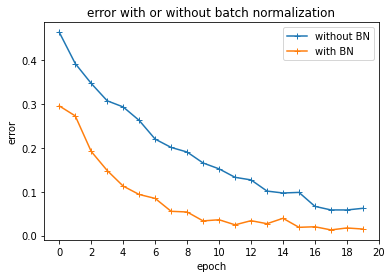

In [6]:
plt.plot(train_errors_original, '-+')
plt.plot(train_errors_BN, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['without BN', 'with BN'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with or without batch normalization')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

In [ ]:
plt.plot(train_errors_BN, '-+')
plt.plot(test_errors_BN, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error on training and testing set')

plt.show()

In [10]:
losses_BN = [[], [], [], []]
for ind in range(4):
    model = NN_BN()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr[ind])
    criterion = nn.CrossEntropyLoss()

    root = '../Result/NN BN ' + str(lr[ind])
    best_model_file = os.path.join(root, 'model.pt')
    losses_file = os.path.join(root, 'losses.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lr =', lr[ind])
    losses_BN[ind], _, _ = \
        train(model, optimizer, criterion, train_loader, test_loader, device = device,
              wrap_tqdms = False, print_errors = True,
              best_model_file = best_model_file, losses_file = losses_file,
              train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

Epoch:  1	Train Error: 0.29542	Test Error: 0.33330
Epoch:  2	Train Error: 0.25584	Test Error: 0.32480
Epoch:  3	Train Error: 0.20476	Test Error: 0.30570
Epoch:  4	Train Error: 0.16476	Test Error: 0.29810
Epoch:  5	Train Error: 0.12952	Test Error: 0.29190
Epoch:  6	Train Error: 0.10958	Test Error: 0.29840
Epoch:  7	Train Error: 0.09348	Test Error: 0.29410
Epoch:  8	Train Error: 0.08430	Test Error: 0.30510
Epoch:  9	Train Error: 0.04722	Test Error: 0.29040
Epoch: 10	Train Error: 0.03158	Test Error: 0.29120
Epoch: 11	Train Error: 0.03856	Test Error: 0.29320
Epoch: 12	Train Error: 0.03700	Test Error: 0.30530
Epoch: 13	Train Error: 0.02674	Test Error: 0.29200
Epoch: 14	Train Error: 0.02238	Test Error: 0.29630
Epoch: 15	Train Error: 0.01922	Test Error: 0.29160
Epoch: 16	Train Error: 0.02038	Test Error: 0.29490
Epoch: 17	Train Error: 0.01266	Test Error: 0.29520
Epoch: 18	Train Error: 0.02598	Test Error: 0.30410
Epoch: 19	Train Error: 0.01136	Test Error: 0.29460
Epoch: 20	Train Error: 0.02194	

In [26]:
losses_BN = []
for ind in range(4):
    root = '../Result/NN BN ' + str(lr[ind])
    losses_file = os.path.join(root, 'losses.pt')

    losses_BN.append(torch.load(losses_file))

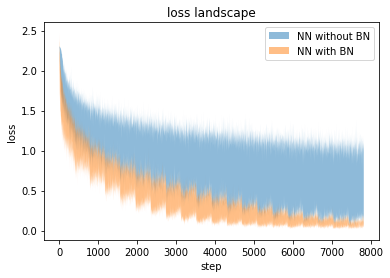

In [119]:
min_curve, max_curve = loss_landscape(losses_original)
plt.fill_between(range(len(min_curve)), min_curve, max_curve, alpha = 0.5)

min_curve, max_curve = loss_landscape(losses_BN)
plt.fill_between(range(len(min_curve)), min_curve, max_curve, alpha = 0.5)

plt.legend(['NN without BN', 'NN with BN'])
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss landscape')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 丢弃法

In [ ]:
prob = (0.2, 0.5)
train_errors_dropout = [[], []]
test_errors_dropout = [[], []]
for ind in range(2):
    model = NN_dropout(prob = prob[ind])
    optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    criterion = nn.CrossEntropyLoss()

    root = '../Result/NN dropout ' + str(prob[ind])
    best_model_file = os.path.join(root, 'model.pt')
    losses_file = os.path.join(root, 'losses.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('prob =', prob[ind])
    _, train_errors_dropout[ind], test_errors_dropout[ind] = \
        train(model, optimizer, criterion, train_loader, test_loader, device = device,
              wrap_tqdms = False, print_errors = True,
              best_model_file = best_model_file, losses_file = losses_file,
              train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

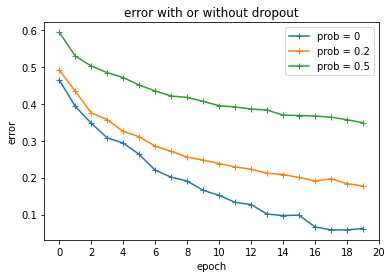

In [71]:
plt.plot(train_errors_original, '-+')
plt.plot(train_errors_dropout[0], '-+')
plt.plot(train_errors_dropout[1], '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['prob = 0', 'prob = 0.2', 'prob = 0.5'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with or without dropout')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

## 最优设置

In [11]:
model = NN_BN(hidden_channels = (64, 128), hidden_neurons = (512, 512))
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

root = '../Result/NN opt'
best_model_file = os.path.join(root, 'model.pt')
losses_file = os.path.join(root, 'losses.pt')
train_errors_file = os.path.join(root, 'train_errors.pt')
test_errors_file = os.path.join(root, 'test_errors.pt')

losses, train_errors_opt, test_errors_opt = \
    train(model, optimizer, criterion, train_loader, test_loader, device = device,
          wrap_tqdms = False, print_errors = True,
          best_model_file = best_model_file, losses_file = losses_file,
          train_errors_file = train_errors_file, test_errors_file = test_errors_file)

Epoch:  1	Train Error: 0.22986	Test Error: 0.28330
Epoch:  2	Train Error: 0.21084	Test Error: 0.29680
Epoch:  3	Train Error: 0.10234	Test Error: 0.24600
Epoch:  4	Train Error: 0.07902	Test Error: 0.26760
Epoch:  5	Train Error: 0.07092	Test Error: 0.27530
Epoch:  6	Train Error: 0.03784	Test Error: 0.25500
Epoch:  7	Train Error: 0.06066	Test Error: 0.27360
Epoch:  8	Train Error: 0.03044	Test Error: 0.26270
Epoch:  9	Train Error: 0.02526	Test Error: 0.25510
Epoch: 10	Train Error: 0.01612	Test Error: 0.24750
Epoch: 11	Train Error: 0.02386	Test Error: 0.25430
Epoch: 12	Train Error: 0.02920	Test Error: 0.26870
Epoch: 13	Train Error: 0.01768	Test Error: 0.24660
Epoch: 14	Train Error: 0.00834	Test Error: 0.24250
Epoch: 15	Train Error: 0.01184	Test Error: 0.24620
Epoch: 16	Train Error: 0.01082	Test Error: 0.24460
Epoch: 17	Train Error: 0.01660	Test Error: 0.25170
Epoch: 18	Train Error: 0.00612	Test Error: 0.24010
Epoch: 19	Train Error: 0.00520	Test Error: 0.23760
Epoch: 20	Train Error: 0.00664	

In [ ]:
plt.plot(train_errors_opt, '-+')
plt.plot(test_errors_opt, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['train', 'test'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error on training and testing set')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

# VGG网络

In [123]:
losses_original = [[], [], [], []]
for ind in range(4):
    model = VGG()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr[ind])
    criterion = nn.CrossEntropyLoss()

    root = '../Result/VGG original ' + str(lr[ind])
    best_model_file = os.path.join(root, 'model.pt')
    losses_file = os.path.join(root, 'losses.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lr =', lr[ind])
    losses_original[ind], _, _ = \
        train(model, optimizer, criterion, train_loader, test_loader, device = device,
              wrap_tqdms = True, print_errors = True,
              best_model_file = best_model_file, losses_file = losses_file,
              train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

lr = 0.001


Epoch:  1/20: 100%|██████████| 79/79 [00:49<00:00,  1.59batch/s]


Epoch:  1	Train Error: 0.62596	Test Error: 0.62720


Epoch:  2/20: 100%|██████████| 79/79 [01:00<00:00,  1.30batch/s]


Epoch:  2	Train Error: 0.47468	Test Error: 0.48990


Epoch:  3/20: 100%|██████████| 79/79 [00:48<00:00,  1.62batch/s]


Epoch:  3	Train Error: 0.37530	Test Error: 0.39950


Epoch:  4/20: 100%|██████████| 79/79 [01:00<00:00,  1.30batch/s]


Epoch:  4	Train Error: 0.30106	Test Error: 0.34020


Epoch:  5/20: 100%|██████████| 79/79 [00:45<00:00,  1.75batch/s]


Epoch:  5	Train Error: 0.26238	Test Error: 0.31250


Epoch:  6/20: 100%|██████████| 79/79 [00:51<00:00,  1.53batch/s]


Epoch:  6	Train Error: 0.22708	Test Error: 0.29220


Epoch:  7/20: 100%|██████████| 79/79 [00:45<00:00,  1.72batch/s]


Epoch:  7	Train Error: 0.19056	Test Error: 0.27460


Epoch:  8/20: 100%|██████████| 79/79 [00:51<00:00,  1.53batch/s]


Epoch:  8	Train Error: 0.14792	Test Error: 0.25680


Epoch:  9/20: 100%|██████████| 79/79 [00:45<00:00,  1.72batch/s]


Epoch:  9	Train Error: 0.13266	Test Error: 0.26490


Epoch: 10/20: 100%|██████████| 79/79 [00:54<00:00,  1.46batch/s]


Epoch: 10	Train Error: 0.11830	Test Error: 0.26190


Epoch: 11/20: 100%|██████████| 79/79 [00:47<00:00,  1.66batch/s]


Epoch: 11	Train Error: 0.09718	Test Error: 0.26540


Epoch: 12/20: 100%|██████████| 79/79 [00:54<00:00,  1.45batch/s]


Epoch: 12	Train Error: 0.07026	Test Error: 0.25520


Epoch: 13/20: 100%|██████████| 79/79 [00:48<00:00,  1.62batch/s]


Epoch: 13	Train Error: 0.06464	Test Error: 0.25950


Epoch: 14/20: 100%|██████████| 79/79 [00:47<00:00,  1.65batch/s]


Epoch: 14	Train Error: 0.06680	Test Error: 0.25970


Epoch: 15/20: 100%|██████████| 79/79 [00:45<00:00,  1.73batch/s]


Epoch: 15	Train Error: 0.04408	Test Error: 0.25210


Epoch: 16/20: 100%|██████████| 79/79 [00:46<00:00,  1.72batch/s]


Epoch: 16	Train Error: 0.05188	Test Error: 0.26190


Epoch: 17/20: 100%|██████████| 79/79 [00:54<00:00,  1.46batch/s]


Epoch: 17	Train Error: 0.03200	Test Error: 0.25690


Epoch: 18/20: 100%|██████████| 79/79 [00:48<00:00,  1.62batch/s]


Epoch: 18	Train Error: 0.03468	Test Error: 0.25460


Epoch: 19/20: 100%|██████████| 79/79 [00:44<00:00,  1.77batch/s]


Epoch: 19	Train Error: 0.02462	Test Error: 0.25530


Epoch: 20/20: 100%|██████████| 79/79 [00:44<00:00,  1.78batch/s]


Epoch: 20	Train Error: 0.02586	Test Error: 0.25190

lr = 0.002


Epoch:  1/20: 100%|██████████| 79/79 [00:45<00:00,  1.72batch/s]


Epoch:  1	Train Error: 0.69588	Test Error: 0.69650


Epoch:  2/20: 100%|██████████| 79/79 [00:45<00:00,  1.72batch/s]


Epoch:  2	Train Error: 0.56180	Test Error: 0.56510


Epoch:  3/20: 100%|██████████| 79/79 [00:58<00:00,  1.35batch/s]


Epoch:  3	Train Error: 0.47566	Test Error: 0.49010


Epoch:  4/20: 100%|██████████| 79/79 [00:48<00:00,  1.61batch/s]


Epoch:  4	Train Error: 0.40008	Test Error: 0.42130


Epoch:  5/20: 100%|██████████| 79/79 [00:48<00:00,  1.61batch/s]


Epoch:  5	Train Error: 0.35504	Test Error: 0.37950


Epoch:  6/20: 100%|██████████| 79/79 [00:54<00:00,  1.45batch/s]


Epoch:  6	Train Error: 0.33380	Test Error: 0.37010


Epoch:  7/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch:  7	Train Error: 0.31358	Test Error: 0.35810


Epoch:  8/20: 100%|██████████| 79/79 [01:16<00:00,  1.03batch/s]


Epoch:  8	Train Error: 0.27754	Test Error: 0.33410


Epoch:  9/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch:  9	Train Error: 0.27982	Test Error: 0.34750


Epoch: 10/20: 100%|██████████| 79/79 [00:49<00:00,  1.61batch/s]


Epoch: 10	Train Error: 0.27142	Test Error: 0.34490


Epoch: 11/20: 100%|██████████| 79/79 [00:47<00:00,  1.65batch/s]


Epoch: 11	Train Error: 0.24464	Test Error: 0.33170


Epoch: 12/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch: 12	Train Error: 0.21726	Test Error: 0.32060


Epoch: 13/20: 100%|██████████| 79/79 [00:47<00:00,  1.65batch/s]


Epoch: 13	Train Error: 0.19102	Test Error: 0.31640


Epoch: 14/20: 100%|██████████| 79/79 [00:45<00:00,  1.73batch/s]


Epoch: 14	Train Error: 0.18338	Test Error: 0.31850


Epoch: 15/20: 100%|██████████| 79/79 [00:45<00:00,  1.74batch/s]


Epoch: 15	Train Error: 0.16458	Test Error: 0.31620


Epoch: 16/20: 100%|██████████| 79/79 [00:45<00:00,  1.75batch/s]


Epoch: 16	Train Error: 0.16852	Test Error: 0.31760


Epoch: 17/20: 100%|██████████| 79/79 [00:45<00:00,  1.74batch/s]


Epoch: 17	Train Error: 0.15250	Test Error: 0.32200


Epoch: 18/20: 100%|██████████| 79/79 [00:47<00:00,  1.67batch/s]


Epoch: 18	Train Error: 0.13042	Test Error: 0.30960


Epoch: 19/20: 100%|██████████| 79/79 [00:47<00:00,  1.65batch/s]


Epoch: 19	Train Error: 0.14256	Test Error: 0.31670


Epoch: 20/20: 100%|██████████| 79/79 [00:48<00:00,  1.63batch/s]


Epoch: 20	Train Error: 0.11596	Test Error: 0.31570

lr = 0.0001


Epoch:  1/20: 100%|██████████| 79/79 [00:49<00:00,  1.61batch/s]


Epoch:  1	Train Error: 0.62446	Test Error: 0.62290


Epoch:  2/20: 100%|██████████| 79/79 [00:49<00:00,  1.61batch/s]


Epoch:  2	Train Error: 0.54510	Test Error: 0.54790


Epoch:  3/20: 100%|██████████| 79/79 [00:48<00:00,  1.61batch/s]


Epoch:  3	Train Error: 0.47042	Test Error: 0.47880


Epoch:  4/20: 100%|██████████| 79/79 [00:48<00:00,  1.62batch/s]


Epoch:  4	Train Error: 0.44208	Test Error: 0.45290


Epoch:  5/20: 100%|██████████| 79/79 [00:46<00:00,  1.69batch/s]


Epoch:  5	Train Error: 0.35442	Test Error: 0.38050


Epoch:  6/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch:  6	Train Error: 0.32648	Test Error: 0.35980


Epoch:  7/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch:  7	Train Error: 0.27510	Test Error: 0.32320


Epoch:  8/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch:  8	Train Error: 0.25392	Test Error: 0.31230


Epoch:  9/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch:  9	Train Error: 0.20854	Test Error: 0.29070


Epoch: 10/20: 100%|██████████| 79/79 [00:46<00:00,  1.69batch/s]


Epoch: 10	Train Error: 0.17156	Test Error: 0.27410


Epoch: 11/20: 100%|██████████| 79/79 [00:46<00:00,  1.69batch/s]


Epoch: 11	Train Error: 0.17398	Test Error: 0.29290


Epoch: 12/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch: 12	Train Error: 0.11030	Test Error: 0.26620


Epoch: 13/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch: 13	Train Error: 0.08412	Test Error: 0.26430


Epoch: 14/20: 100%|██████████| 79/79 [00:45<00:00,  1.73batch/s]


Epoch: 14	Train Error: 0.07294	Test Error: 0.26870


Epoch: 15/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch: 15	Train Error: 0.05020	Test Error: 0.26810


Epoch: 16/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch: 16	Train Error: 0.06502	Test Error: 0.29070


Epoch: 17/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch: 17	Train Error: 0.03898	Test Error: 0.27220


Epoch: 18/20: 100%|██████████| 79/79 [00:46<00:00,  1.70batch/s]


Epoch: 18	Train Error: 0.02060	Test Error: 0.25610


Epoch: 19/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch: 19	Train Error: 0.02102	Test Error: 0.25580


Epoch: 20/20: 100%|██████████| 79/79 [00:46<00:00,  1.68batch/s]


Epoch: 20	Train Error: 0.03014	Test Error: 0.26140

lr = 0.0005


Epoch:  1/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch:  1	Train Error: 0.68174	Test Error: 0.68370


Epoch:  2/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch:  2	Train Error: 0.44440	Test Error: 0.45610


Epoch:  3/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch:  3	Train Error: 0.33468	Test Error: 0.36830


Epoch:  4/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch:  4	Train Error: 0.26424	Test Error: 0.31690


Epoch:  5/20: 100%|██████████| 79/79 [00:47<00:00,  1.68batch/s]


Epoch:  5	Train Error: 0.21600	Test Error: 0.28910


Epoch:  6/20: 100%|██████████| 79/79 [00:44<00:00,  1.77batch/s]


Epoch:  6	Train Error: 0.16750	Test Error: 0.26490


Epoch:  7/20: 100%|██████████| 79/79 [00:48<00:00,  1.63batch/s]


Epoch:  7	Train Error: 0.11210	Test Error: 0.24920


Epoch:  8/20: 100%|██████████| 79/79 [00:48<00:00,  1.63batch/s]


Epoch:  8	Train Error: 0.07856	Test Error: 0.24650


Epoch:  9/20: 100%|██████████| 79/79 [00:53<00:00,  1.47batch/s]


Epoch:  9	Train Error: 0.06030	Test Error: 0.24710


Epoch: 10/20: 100%|██████████| 79/79 [00:49<00:00,  1.60batch/s]


Epoch: 10	Train Error: 0.04944	Test Error: 0.25400


Epoch: 11/20: 100%|██████████| 79/79 [00:46<00:00,  1.69batch/s]


Epoch: 11	Train Error: 0.04286	Test Error: 0.24560


Epoch: 12/20: 100%|██████████| 79/79 [00:46<00:00,  1.71batch/s]


Epoch: 12	Train Error: 0.03116	Test Error: 0.24920


Epoch: 13/20: 100%|██████████| 79/79 [01:11<00:00,  1.10batch/s]


Epoch: 13	Train Error: 0.02404	Test Error: 0.24200


Epoch: 14/20: 100%|██████████| 79/79 [00:51<00:00,  1.55batch/s]


Epoch: 14	Train Error: 0.02326	Test Error: 0.24920


Epoch: 15/20: 100%|██████████| 79/79 [00:48<00:00,  1.65batch/s]


Epoch: 15	Train Error: 0.02032	Test Error: 0.24330


Epoch: 16/20: 100%|██████████| 79/79 [00:49<00:00,  1.59batch/s]


Epoch: 16	Train Error: 0.01544	Test Error: 0.23810


Epoch: 17/20: 100%|██████████| 79/79 [00:48<00:00,  1.64batch/s]


Epoch: 17	Train Error: 0.01600	Test Error: 0.24330


Epoch: 18/20: 100%|██████████| 79/79 [00:52<00:00,  1.52batch/s]


Epoch: 18	Train Error: 0.01462	Test Error: 0.24120


Epoch: 19/20: 100%|██████████| 79/79 [00:47<00:00,  1.68batch/s]


Epoch: 19	Train Error: 0.01694	Test Error: 0.24570


Epoch: 20/20: 100%|██████████| 79/79 [00:52<00:00,  1.51batch/s]

Epoch: 20	Train Error: 0.01442	Test Error: 0.24200



In [8]:
losses_original = []
for ind in range(4):
    root = '../Result/VGG original ' + str(lr[ind])
    losses_file = os.path.join(root, 'losses.pt')

    losses_original.append(torch.load(losses_file))

In [ ]:
losses_BN = [[], [], [], []]
for ind in range(4):
    model = VGG_BN()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr[ind])
    criterion = nn.CrossEntropyLoss()

    root = '../Result/VGG BN ' + str(lr[ind])
    best_model_file = os.path.join(root, 'model.pt')
    losses_file = os.path.join(root, 'losses.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lr =', lr[ind])
    losses_BN[ind], _, _ = \
        train(model, optimizer, criterion, train_loader, test_loader, device = device,
              wrap_tqdms = True, print_errors = True,
              best_model_file = best_model_file, losses_file = losses_file,
              train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

In [9]:
losses_BN = []
for ind in range(4):
    root = '../Result/VGG BN ' + str(lr[ind])
    losses_file = os.path.join(root, 'losses.pt')

    losses_BN.append(torch.load(losses_file))

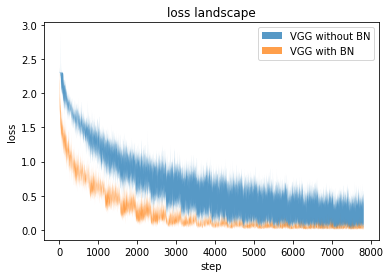

In [19]:
min_curve, max_curve = loss_landscape(losses_original)
plt.fill_between(range(len(min_curve)), min_curve, max_curve, alpha = 0.75)

min_curve, max_curve = loss_landscape(losses_BN)
plt.fill_between(range(len(min_curve)), min_curve, max_curve, alpha = 0.75)

plt.legend(['VGG without BN', 'VGG with BN'])
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss landscape')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

In [26]:
root = '../Result/VGG original 0.001'
train_errors_file = os.path.join(root, 'train_errors.pt')
train_errors_original = torch.load(train_errors_file, map_location = torch.device('cpu'))

root = '../Result/VGG BN 0.001'
train_errors_file = os.path.join(root, 'train_errors.pt')
train_errors_BN = torch.load(train_errors_file, map_location = torch.device('cpu'))

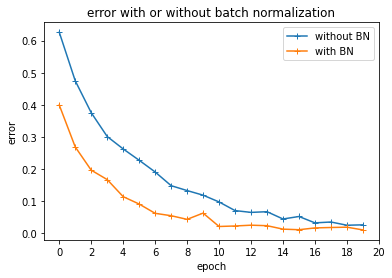

In [27]:
plt.plot(train_errors_original, '-+')
plt.plot(train_errors_BN, '-+')
plt.xticks(range(0, 21, 2))
plt.legend(['without BN', 'with BN'])
plt.xlabel('epoch')
plt.ylabel('error')
plt.title('error with or without batch normalization')

fig_file = os.path.join(root, 'figure.png')
plt.savefig(fig_file)

plt.show()

In [17]:
lr = [1e-3, 2e-3, 1e-4, 5e-4]

In [ ]:
outputs_original = [[], [], [], []]
grads_original = [[], [], [], []]
for ind in range(4):
    model = VGG()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr[ind])
    criterion = nn.CrossEntropyLoss()

    root = '../Result/VGG original ' + str(lr[ind])
    best_model_file = os.path.join(root, 'model.pt')
    outputs_file = os.path.join(root, 'outputs.pt')
    grads_file = os.path.join(root, 'grads.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lr =', lr[ind])
    outputs_original[ind], grads_original[ind], _, _ = \
        train_plus(model, optimizer, criterion, train_loader, test_loader, device = device,
                   wrap_tqdms = True, print_errors = True,
                   best_model_file = best_model_file, outputs_file = outputs_file, grads_file = grads_file,
                   train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

In [ ]:
outputs_BN = [[], [], [], []]
grads_BN = [[], [], [], []]
for ind in range(4):
    model = VGG_BN()
    optimizer = torch.optim.Adam(model.parameters(), lr = lr[ind])
    criterion = nn.CrossEntropyLoss()

    root = '../Result/VGG BN ' + str(lr[ind])
    best_model_file = os.path.join(root, 'model.pt')
    outputs_file = os.path.join(root, 'outputs.pt')
    grads_file = os.path.join(root, 'grads.pt')
    train_errors_file = os.path.join(root, 'train_errors.pt')
    test_errors_file = os.path.join(root, 'test_errors.pt')

    print('lr =', lr[ind])
    outputs_BN[ind], grads_BN[ind], _, _ = \
        train_plus(model, optimizer, criterion, train_loader, test_loader, device = device,
                   wrap_tqdms = True, print_errors = True,
                   best_model_file = best_model_file, outputs_file = outputs_file, grads_file = grads_file,
                   train_errors_file = train_errors_file, test_errors_file = test_errors_file)
    print()

In [33]:
x = torch.tensor([[1,2,3],[3,4,5]])

In [30]:
x - torch.max(x, dim = 1).values.view(2, 1)

tensor([[-2, -1,  0],
        [-2, -1,  0]])

In [29]:
torch.broadcast_to(torch.max(x, dim = 1).values.view(2, 1), (2, 3))

tensor([[3, 3, 3],
        [5, 5, 5]])

In [26]:
x

tensor([[1, 2, 3],
        [3, 4, 5]])